# Final Project

Tony Nguyen

CPSC 222 01

Dr. Gina Sprint

December 13th, 2022

In [701]:
import utils
import importlib

importlib.reload(utils)

<module 'utils' from '/Users/tony/Documents/Python/CPSC222/FinalProject/utils.py'>

## Introduction

For our class final project, I choose to work primarily with my **Apple Health Sleep Data** and **Netflix Watching History**.

Throughout this project, I want to learn more about my sleep history, specifically, how long would I sleep each night on average. I realize that it is instrumental to have a decent amount of sleep since we are all working in a high academic-demadning environment; thus, being able to sleep well is one of the easiest way to prevent ourselves from burning out.

I am a big Netflix user. Watching series on Netflix is one of my ways to relax after school and work. Therefore, I want to know if there would be a correlation between the amount of serie episodes or movies I watched and the total time I got to sleep each night.

I hope the result of this project can provide a glimpse of my sleep routine, something that I usually take for granted without thinking much about how much I had actually slept the night before. At the same time, I want to know if Netflix would play a role in my sleep routine, since I find myself binge watch a lot. Besides, as the Apple Health Data is very extensive that covers other data type, hopefully in the future I can do some further analysis with other health data and find something interesting like this one.

**TODO: STAKEHOLDERS INTERESTED IN THE RESULT AND HYPOTHESES**

### Apple Health Sleep Dataset

The original Apple Health Dataset takeout contains several tables in different formats including electrocardiogram in CSV, workout routes in GPX, health clinical reports in JSON and an XML that has other data points that my phone and my watch collects. The file type I will be working with is XML.

In this original XML file called `export.xml`, there are multiple entries for different type of health information, including the sleep data that I need. And since this XML file is too big, at approximately 390MB, it takes my computer a very long time to work with if I load it directly into a DataFrame. It is essentially unwsie since I will need to re-run this notebook multiple times during my coding process.

Therefore, in the file `healthdata_preprocessing.py`, I load the original XML file into a DataFrame, then export it to a CSV file called `export_converted.csv`. Although the exported CSV size is still relatively big at roughly 260MB, the time it takes to run is significantly faster.

From this point forward, I will use the CSV file to work with the health data. After the format conversion, there is a total of 946,979 instances, varies across different data type. The attributes of this dataset is as follow:
* `type`: Type of data point. I use this one to filter sleep data later.
* `sourceName`: Where does that data come from. The common instances are my iPhone and my Apple Watch. There are also other instances such as the Health app or *MyChart*, the portal that my hospital use.
* `sourceVersion`: The software version of `sourceName`.
* `unit`: The unit of data records. Depending on which type of data it is, there will be a corresponding unit.
* `creationDate`: The time when an instance is logged.
* `startDate`: For those entries that record a period, this is the time when the record starts. 
* `endDate`: For those entries that record a period, this is the time when the record ends. 
* `value`: The value of a record. E.g., duration of sleep for sleep data
* `device`: Hardware information, if applicable. It contains `sourceName`'s name, manufacturer, model, hardware version, and software version.
* `MetadataEntry`: Include a key-value pair.
* `HeartRateVariabilityMetadataList`: For heart rate data, record a list of Instantaneous Beat Per Minute.

Apple has a specific sleep mode that I have been using to record my sleep information. Every night just before I put my phone down and go to sleep, I turn sleep mode on, which prompts the phone to start counting my sleep time. And the next morning, at the wake up time that I set earlier, it will start playing alarm sound from quieter to lounder so as to not aruptly wake me up, which can deliver a better sleep experience. If I happen to wake up during the night and go back to sleep later, it can automaticaly subtract the actual time that I am awake from my sleep time. The whole process can get even more precise if paired with an Apple Watch, which can analyze different sleep stages and respiratory rate. These information can be really helpful for further analysis, but since most of the time I do not wear my watch to sleep, I decide to not include those sleep stages information as they are insufficient on a daily basis. Read more about Apple's sleep mode [here](https://support.apple.com/en-us/HT211685).

**TODO: CLASSIFICATION TASK**

**Important Notes**: 
1. In order for the `pandas.read_xml()` function to work, I manually remove the first 213 lines (out of 1,443,267 lines) in the XML file. Those 213 lines are Apple's description of how to interprete the instances.
1. At the time I exported the data, Apple returns a dataset with all of the instances timestamp in Pacific Standard Time (PST), based on my current time zone. As I travel back and forth occasionally between the U.S and Vietnam, there are some instances that are recorded in different time zones and converted back to PST. This results in those instances have my sleep time started to record at unconventional times, such as in the middle of the day, which may cause inaccuracy when performing analysis.

### Netflix Viewing History Dataset
The Netflix data comes in a CSV format, which contains my viewing history since I start using the service. This dataset only has table that has the following attributes:
* `Title`: The name of a movie or a serie episode.
* `Date`: The watch date. Since Netflix does not provide additional information about the specific time that I watch, or which time zone those information are recorded in, I assume they are recorded based on my watch location, which may have different time zones.

There are 2,578 instances in this dataset, lasting from January 25, 2020 to November 29, 2022 - the point I downloaded this dataset.

**TODO: CLASSIFICATION TASK**

## Data Analysis
### Apple Health Dataset
#### Data Preparation and Cleaning
From the converted CSV file of the preprocessing step, I loaded them into a pandas DataFrame. I also convert `creationDate`, `startDate`, and `endDate` into datetime format.

In [702]:
df = utils.load_apple()
df.tail(10)

/Users/tony/Documents/Python/CPSC222/FinalProject/utils.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("export_converted.csv")


,originalIndex,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
946970,946970,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 14:29:24-08:00,2022-11-27 14:28:23-08:00,2022-11-27 14:29:22-08:00,72.2227,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946971,946971,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 16:26:12-08:00,2022-11-27 16:25:01-08:00,2022-11-27 16:25:57-08:00,44.5048,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946972,946972,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-27 18:30:47-08:00,2022-11-27 18:29:46-08:00,2022-11-27 18:30:46-08:00,26.2327,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946973,946973,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 08:00:59-08:00,2022-11-28 07:59:58-08:00,2022-11-28 08:00:58-08:00,27.0778,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946974,946974,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 08:47:54-08:00,2022-11-28 08:46:53-08:00,2022-11-28 08:47:52-08:00,21.1496,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946975,946975,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 10:24:48-08:00,2022-11-28 10:23:47-08:00,2022-11-28 10:24:46-08:00,24.8409,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946976,946976,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 12:28:40-08:00,2022-11-28 12:27:39-08:00,2022-11-28 12:28:39-08:00,13.0849,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946977,946977,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 14:23:52-08:00,2022-11-28 14:22:51-08:00,2022-11-28 14:23:45-08:00,17.1092,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946978,946978,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 16:34:54-08:00,2022-11-28 16:33:53-08:00,2022-11-28 16:34:53-08:00,26.8948,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN
946979,946979,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Tony’s Apple Watch,9.1,ms,2022-11-28 18:23:48-08:00,2022-11-28 18:22:47-08:00,2022-11-28 18:23:47-08:00,13.2906,"<<HKDevice: 0x2815fd360>, name:Apple Watch, ma...",NaN,NaN


Since this project concerns only with my sleep data, I will filter out those instances whose data is sleep.

In [703]:
df = utils.sleep_filtering(df)
df.tail(10)

,originalIndex,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,MetadataEntry,HeartRateVariabilityMetadataList
937029,937029,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-19 08:00:03-08:00,2022-11-18 23:58:22-08:00,2022-11-19 07:28:58-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937030,937030,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-20 09:09:31-08:00,2022-11-20 03:14:28-08:00,2022-11-20 09:09:19-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937031,937031,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-21 06:56:37-08:00,2022-11-21 00:52:02-08:00,2022-11-21 06:42:47-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937032,937032,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-22 06:45:22-08:00,2022-11-22 00:26:27-08:00,2022-11-22 06:45:22-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937033,937033,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-23 07:09:08-08:00,2022-11-23 00:31:18-08:00,2022-11-23 06:48:28-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937034,937034,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937035,937035,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937036,937036,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937037,937037,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN
937038,937038,HKCategoryTypeIdentifierSleepAnalysis,Tony,16.1,NaN,2022-11-29 06:40:15-08:00,2022-11-29 00:13:46-08:00,2022-11-29 06:40:14-08:00,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN


Next, I drop the following columns as they are not needed for this project: `type`, `sourceName`, `sourceVersion`, `unit`, `value`, `device`, `MetadataEntry`, `HeartRateVariabilityMetadataList`, and `originalIndex`. I decide to drop `originalIndex` as although it might be useful for me if I need to make reference to the original dataset later, I also call `reset_index()` function. This function produces another column called `Index`, which is the same as the `originalIndex`; thus, keeping both make it becomes redundant.

In [704]:
df = utils.sleep_cleaning(df)
df

,index,creationDate,startDate,endDate
0,936101,2016-07-07 15:32:30-08:00,2016-07-07 08:39:56-08:00,2016-07-07 15:32:29-08:00
1,936102,2016-07-08 15:55:36-08:00,2016-07-08 08:30:32-08:00,2016-07-08 08:53:40-08:00
2,936103,2016-07-08 15:55:36-08:00,2016-07-08 08:54:00-08:00,2016-07-08 15:55:35-08:00
3,936104,2016-07-09 17:33:56-08:00,2016-07-09 08:49:44-08:00,2016-07-09 17:33:55-08:00
4,936105,2016-07-10 17:05:15-08:00,2016-07-10 08:29:32-08:00,2016-07-10 17:05:15-08:00
...,...,...,...,...
933,937034,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00
934,937035,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00
935,937036,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00
936,937037,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00


Calculate sleep time. Concatenate a new column
Since Apple does not provide a total time of sleep per each entry, I perform a substraction of `endDate` and `startDate` to find the sleep time. Then, I concatenate the new-finding result to the DataFrame, named `sleepTime`

In [705]:
sleepTime, df = utils.time_calculation(df)
df

,index,creationDate,startDate,endDate,sleepTime
0,936101,2016-07-07 15:32:30-08:00,2016-07-07 08:39:56-08:00,2016-07-07 15:32:29-08:00,0 days 06:52:33
1,936102,2016-07-08 15:55:36-08:00,2016-07-08 08:30:32-08:00,2016-07-08 08:53:40-08:00,0 days 00:23:08
2,936103,2016-07-08 15:55:36-08:00,2016-07-08 08:54:00-08:00,2016-07-08 15:55:35-08:00,0 days 07:01:35
3,936104,2016-07-09 17:33:56-08:00,2016-07-09 08:49:44-08:00,2016-07-09 17:33:55-08:00,0 days 08:44:11
4,936105,2016-07-10 17:05:15-08:00,2016-07-10 08:29:32-08:00,2016-07-10 17:05:15-08:00,0 days 08:35:43
...,...,...,...,...,...
933,937034,2022-11-24 06:40:01-08:00,2022-11-24 00:20:11-08:00,2022-11-24 06:40:00-08:00,0 days 06:19:49
934,937035,2022-11-25 08:39:16-08:00,2022-11-25 03:14:23-08:00,2022-11-25 08:39:16-08:00,0 days 05:24:53
935,937036,2022-11-27 07:16:44-08:00,2022-11-27 02:11:47-08:00,2022-11-27 06:40:18-08:00,0 days 04:28:31
936,937037,2022-11-28 06:40:45-08:00,2022-11-27 23:32:00-08:00,2022-11-28 06:40:45-08:00,0 days 07:08:45


#### Number of Awaken Time Calculation and `creationDate` Groupby
Recall that Apple does not automatically add up the total sleep time per night if there was a disruption during sleep by rather record them as different entries, I manually calculate the number of awaken time by seeing if there is any entries that was recorded more than once on a given `creationDate`.

For Awaken Time Calculation, as I use `groupby()` and `values_count()` functions to find the number of time I was awake, I realize there are some oddly big values that seems suspicious. There are 29 instances that have weirdly big value, such as `2021-12-29` with 43 awaken times. Therefore, I manually trace through these specific values and make modification to 20 instances. The reason `values_count()` returns such value is that they are the days that I wore my Apple Watch to sleep and it records sleep stages in the same convention as sleep time; thus, it results in the confusion.

For the other 9 instances that I did not make modification, they happen to be the days that I was traveling, typicaly long-haul flight, so I find it makes sense to have such values.

In [706]:
grouped = utils.awaken_time(df)

After having the awaken time, I concatenate them to the DataFrame and perform a split-apply-combine using `groupby()` to find to

In [707]:
df = utils.sleep_groupby(df, grouped)
df

,sleepTime,numberAwake
2016-07-07,0 days 06:52:33,0
2016-07-08,0 days 07:24:43,1
2016-07-09,0 days 08:44:11,0
2016-07-10,0 days 08:35:43,0
2016-07-11,0 days 07:12:21,0
...,...,...
2022-11-24,0 days 06:19:49,0
2022-11-25,0 days 05:24:53,0
2022-11-27,0 days 04:28:31,0
2022-11-28,0 days 07:08:45,0


#### Day of Week Merging
I create a seperate CSV file named `dow.csv` that has the date and its corresponding day of week. I merge them together with the sleep dataset.

The attributes of the CSV file includes:
* `date`: Date of entry
* `dayOfWeek`: The day of week corresponding to a given date

In [708]:
df = utils.dow_merge(df)
df

,creationDate,sleepTime,numberAwake,dayOfWeek
0,2016-07-07,0 days 06:52:33,0,Thursday
1,2016-07-08,0 days 07:24:43,1,Friday
2,2016-07-09,0 days 08:44:11,0,Saturday
3,2016-07-10,0 days 08:35:43,0,Sunday
4,2016-07-11,0 days 07:12:21,0,Monday
...,...,...,...,...
445,2022-11-24,0 days 06:19:49,0,Thursday
446,2022-11-25,0 days 05:24:53,0,Friday
447,2022-11-27,0 days 04:28:31,0,Sunday
448,2022-11-28,0 days 07:08:45,0,Monday


### Netflix Data
#### Data Preparation and Cleaning
Since the Netflix dataset no longer provides the actual watch time per each entry or the length of an episode or movie, I decide to find the total number of movies/episodes I watch every day to have a general view of how much I have watched daily.

In [709]:
nf = utils.load_netflix()
nf = utils.netflix_count(nf)
nf

,numberWatched
Date,
2020-01-25,1
2020-01-28,1
2020-02-03,1
2020-02-05,1
2020-02-06,1
...,...
2022-11-23,8
2022-11-24,9
2022-11-25,2


#### Netflix Filtering
Since my Netflix Viewing History covers a greater period than my sleep data, I drop instances in the Netflix data that do not have value in the Apple Health Sleep Data.

In [710]:
nf = utils.netflix_filtering(df, nf)
nf

,Date,numberWatched
242,2021-07-17,5
243,2021-07-18,6
244,2021-07-19,5
245,2021-07-21,1
246,2021-07-22,7
...,...,...
494,2022-11-22,10
495,2022-11-23,8
496,2022-11-24,9
497,2022-11-25,2


### Apple Health and Netflix Data Merging
From the two different datasets, I perform an outer merge to have both of them in one table. For those days that the Netflix data does not have an entry, which means I did not watch anything on that day, I will assign a 0 in `numberWatched`, instead of a `NaN/NaT`.

In [711]:
df = utils.sleep_nf_merge(df, nf)
df

,creationDate,sleepTime,numberAwake,dayOfWeek,numberWatched
0,2016-07-07,6.875833,0,Thursday,0.0
1,2016-07-08,7.411944,1,Friday,0.0
2,2016-07-09,8.736389,0,Saturday,0.0
3,2016-07-10,8.595278,0,Sunday,0.0
4,2016-07-11,7.205833,0,Monday,0.0
...,...,...,...,...,...
445,2022-11-24,6.330278,0,Thursday,9.0
446,2022-11-25,5.414722,0,Friday,2.0
447,2022-11-27,4.475278,0,Sunday,0.0
448,2022-11-28,7.145833,0,Monday,0.0


### Semester Split
Here is where I start split my data into two groups, Fall 22 and Spring 22 semester as I want to compare between them. 

I cannot recall exactly when was the beginning date of Spring 22 since the information was taken down on Gonzaga's website. So, I traced back to the most related email from a class that I took in Spring 22 saying its first session was on January 12th, 2022. So, the data ranges from January 12th, 2022 to May 5th, 2022.

For Fall 22, although the semester is not over, I have included all data I have until the point I export the Apple Health data. The data lasts from August 30th, 2022 to November 29th, 2022.

In [712]:
fall_22, spring_22 = utils.sem_split(df)
print(fall_22)
print(spring_22)

    index creationDate  sleepTime  numberAwake  dayOfWeek  numberWatched
0     369   2022-08-30   5.665278            1    Tuesday            5.0
1     370   2022-08-31   7.863333            0  Wednesday            0.0
2     371   2022-09-01   8.522778            0   Thursday            2.0
3     372   2022-09-02   6.581667            0     Friday            3.0
4     373   2022-09-03   6.858889            2   Saturday            0.0
..    ...          ...        ...          ...        ...            ...
76    445   2022-11-24   6.330278            0   Thursday            9.0
77    446   2022-11-25   5.414722            0     Friday            2.0
78    447   2022-11-27   4.475278            0     Sunday            0.0
79    448   2022-11-28   7.145833            0     Monday            0.0
80    449   2022-11-29   6.441111            0    Tuesday            5.0

[81 rows x 6 columns]
    index creationDate  sleepTime  numberAwake  dayOfWeek  numberWatched
0     183   2022-01-12   5.8

In [713]:
fa22_grouped_by_dow = fall_22.groupby("dayOfWeek").mean()
fa22_grouped_by_dow

,index,sleepTime,numberAwake,numberWatched
dayOfWeek,,,,
Friday,408.230769,5.843312,0.230769,1.153846
Monday,410.384615,6.943205,0.076923,1.461538
Saturday,400.888889,7.622191,0.666667,0.555556
Sunday,431.166667,6.571944,0.333333,1.000000
Thursday,407.230769,6.470085,0.000000,1.230769
Tuesday,408.357143,7.119643,0.928571,1.928571
Wednesday,406.230769,7.203974,0.307692,1.076923


#### Statistic Calculation

In [714]:
fall_22.describe()

,index,sleepTime,numberAwake,numberWatched
count,81.000000,81.000000,81.000000,81.000000
mean,409.000000,6.811036,0.358025,1.259259
std,23.526581,1.921921,0.826266,2.245984
min,369.000000,4.475278,0.000000,0.000000
25%,389.000000,5.819444,0.000000,0.000000
50%,409.000000,6.315278,0.000000,0.000000
75%,429.000000,6.965833,0.000000,2.000000
max,449.000000,13.998889,5.000000,10.000000


In [715]:
spring_22.describe()

,index,sleepTime,numberAwake,numberWatched
count,85.000000,85.000000,85.000000,85.000000
mean,225.000000,5.692856,0.376471,1.294118
std,24.681302,1.479429,0.786440,2.028508
min,183.000000,0.071944,0.000000,0.000000
25%,204.000000,4.836111,0.000000,0.000000
50%,225.000000,5.476111,0.000000,0.000000
75%,246.000000,6.607500,0.000000,2.000000
max,267.000000,9.940278,3.000000,7.000000


### Data Visualization


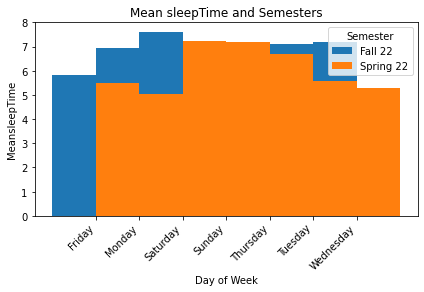

In [716]:
utils.data_visualization(fall_22, spring_22, "sleepTime")